## Segment audio using predetermined temporal length and frequency limits

In an audio signal, regions of interest are usually regions with high density of energy. The function `find_rois_cwt` allows finding regions of interest in the signal giving very simple and intuitive parameters: temporal length and frequency limits. This segmentation can be seen as a coarse detection process, the starting point of more advanced classification methods.

The following sound example as two main different soundtypes in the foreground: 
 - An accelerating trill between 4.5 and 8 kHz lasting approximately 2 seconds
 - A fast descending chirp between 8 and 12 kHz lasting 0.1 approximately seconds


________________________________________________________________________
loading ../data/Cranioleuca.wav...
Sampling frequency: 44100Hz
________________________________________________________________________
Computing spectrogram with nperseg=1024 and noverlap=512...
max value in the audiogram 0.24069
Convert in dB scale
*************************************************************
   Time resolution dt=0.01s | Frequency resolution df=43.07Hz 
*************************************************************


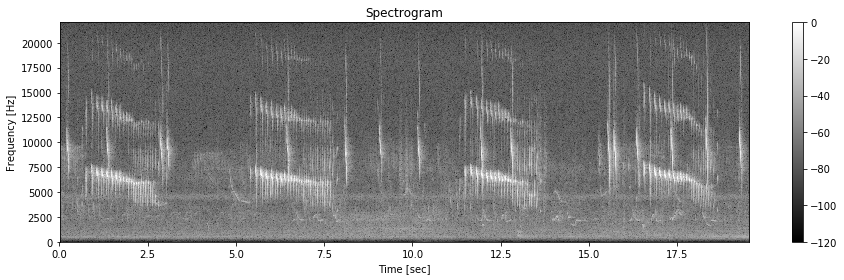

Linear rescale between 0 to 1


In [5]:
from maad.rois import find_rois_cwt
from maad import sound

# load file 
s, fs, _ = sound.load('../data/spinetail.wav')
_ = sound.spectrogram(s, fs, nperseg=1024, db_range=120, display=True)

### Detect the accelerating trill

The accelerating trill is the song of a small neotropical bird, *Cranioleuca erythrops*. This song can be detected on the recording using the function `find_rois_cwt` and setting frequency limits `flims=(4500,8000)` and temporal length of signal `tlen=2`.

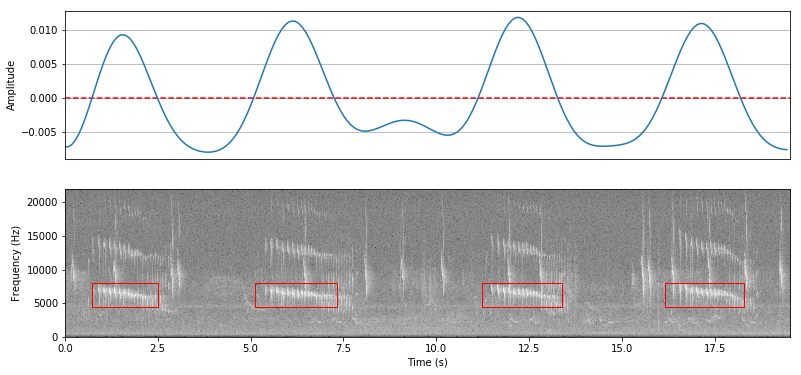

In [6]:
_ = find_rois_cwt(s, fs, flims=(4500,8000), tlen=2, th=0, display=True, figsize=(13,6))

### Detect the fast descending chirp

Alternatively, the fast descending chirp (unknown species) can be segmented in the recording by changing the detection parameters.

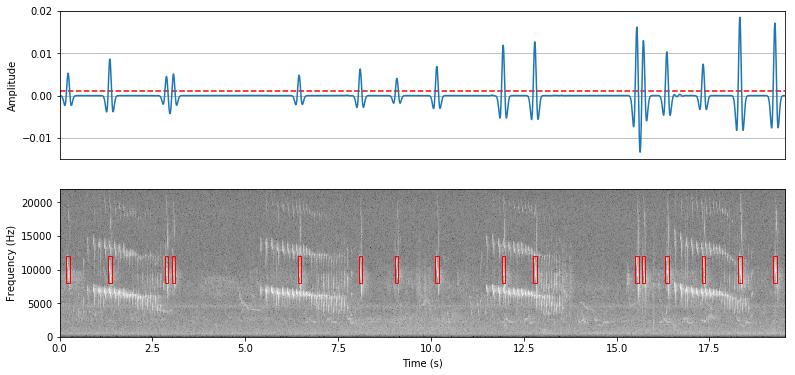

In [14]:
df = find_rois_cwt(s, fs, flims=(8000,12000), tlen=0.1, th=0.001, display=True, figsize=(13,6))

The segmentation results are returned as a dataframe with temporal segmentation given by the function and using the frequency limits defined by the user

In [13]:
print(df)

       onset    fmin    offset     fmax
0    0.18576  8000.0   0.26993  12000.0
1    1.30612  8000.0   1.39900  12000.0
2    2.83574  8000.0   2.91701  12000.0
3    3.02730  8000.0   3.10857  12000.0
4    6.40871  8000.0   6.49288  12000.0
5    8.05152  8000.0   8.14150  12000.0
6    9.04417  8000.0   9.12544  12000.0
7   10.11519  8000.0  10.20517  12000.0
8   11.90023  8000.0  11.99601  12000.0
9   12.75356  8000.0  12.84934  12000.0
10  15.50222  8000.0  15.59220  12000.0
11  15.68508  8000.0  15.77215  12000.0
12  16.31202  8000.0  16.40490  12000.0
13  17.29016  8000.0  17.38014  12000.0
14  18.27701  8000.0  18.37279  12000.0
15  19.22032  8000.0  19.31610  12000.0
